#### Prerequisites:

#### Python:
- Python software should be installed because airflow scripts will be written.
- Python knowledge is fine to manage airflow.

#### Docker: 
- Docker is a containerization platform that allows you to package applications and their dependencies into lightweight, portable containers. These containers can then be run consistently across different environments.

#### Airflow:
- Designed for orchestrating complex workflows and data pipelines.
- It is an open source for programmatically authoring, scheduling and monitoring workflows.
- It allows users to define complex data pipelines as DAG(direct acyclic graph) using python code.

#### Features : 
- Workflow as Code: We can write a code in python.
- Extensibility: Writing common operators, sensors, hooks and enabling integrations with 
- External Apis
- Cloud services
- Databases etc…
- Scalability: Scales effortlessly from small deployments to massive workloads in a cloud environment and supports multiple executors.
- User friendly interface: Web base UI provides Clear visualization of DAGs. task status & logs.
- Monitoring 
- Troubleshooting and 
- Managing workflows.

#### Use Cases:
- Orchestrating batch ETL jobs
- Automating data pipeline execution and monitoring.
- Machine learning model training.
- Generating automated reports
- Managing Devops tasks

#### Why a Data Orchestrator:
- Data orchestration is the process of coordinating & automating the movement, transformation & integration for data across various systems & processes to ensure efficient and reliable data workflows.
- Eg:


#### Traditional ETL Data Pipeline:

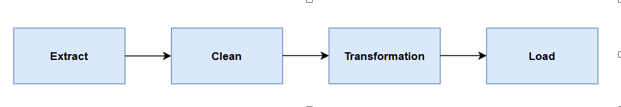

In [22]:
from IPython.display import Image
Image("ETL1.png")

Problems: 
- If step 2 or 3 failed, We should start from first. It is not the ideal way.
- How to schedule for ETL batch jobs.
- How to notify, Whether it is failed/ success
- How to monitor the data pipelines.
- How can we logging and backfilling

Solution: Airflow can solve all above problems.

#### Airflow UI:

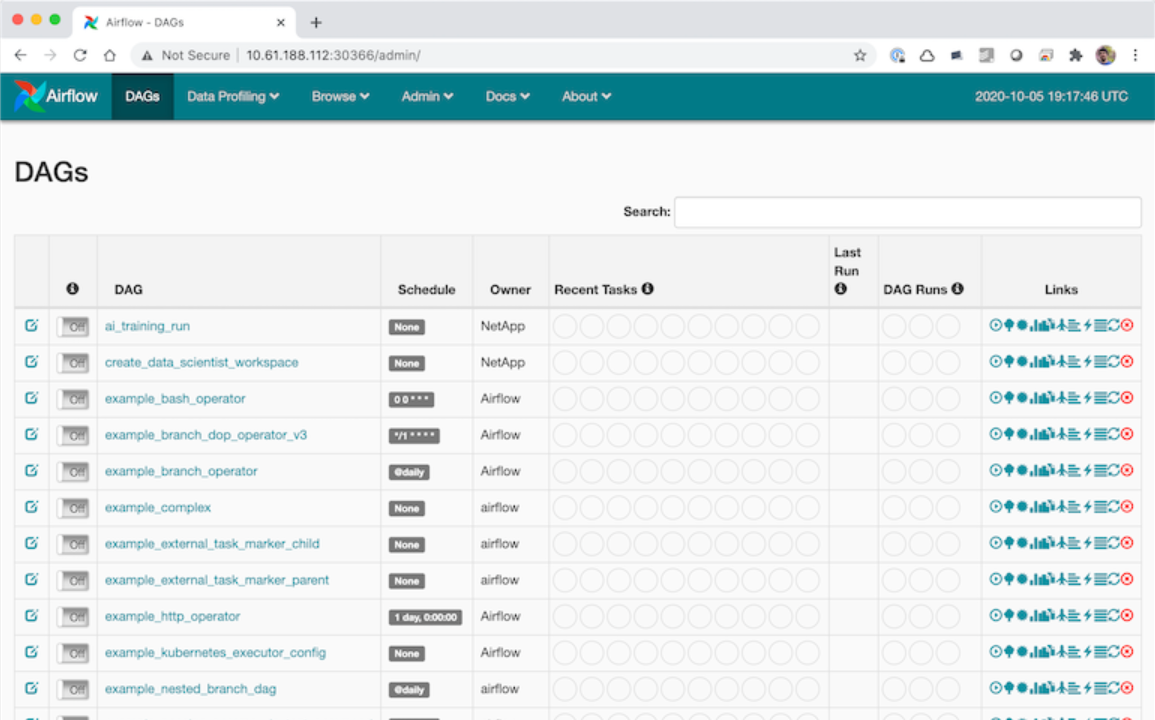

In [23]:
from IPython.display import Image
Image("ETL2.png")

#### Where can we use it :
- Batch ETL pipelines  - Automate
- Machine learning train/test pipelines  - Automate
- Not suitable for real time data

#### DAG (Direct Acyclic Graph):
- It is used to create workflows.
- It is a type of graph that contains  nodes(vertices) and edges.


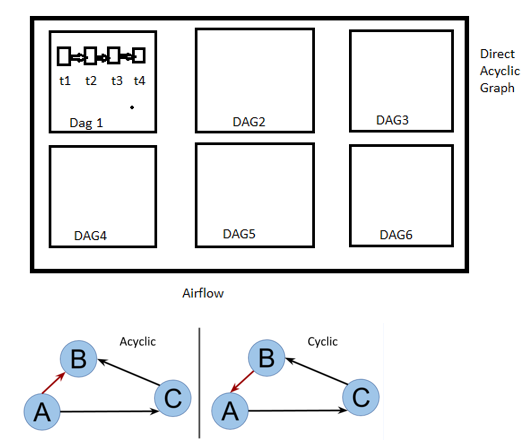

In [24]:
from IPython.display import Image
Image("ETL3.png")

#### Airflow Components:

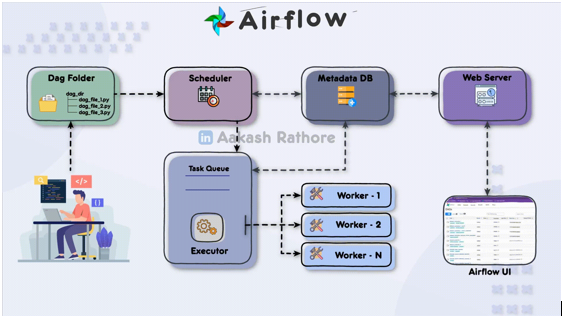

In [25]:
from IPython.display import Image
Image("ETL4.png")

- DAG Folder: DAG folder contains all dag python files

- Scheduler:
    - Responsible for scanning all dag files in DAG Folder and It will parse these files to synchronize with the metadata database ensuring all DAGs and tasks are up to date.
    - Handles the scheduling intervals
         schedule_interval=@daily, @monthly, @hourly, @weekly, @monthly, @quarterly @yearly, ‘*/15 * * * *’     → Every 15 minutes  (cron expression)

- Metadata DB:
    - It is used to store the DAG information like structure, schedule and default arguments
    - Task Information
    - Default stores in sqlite 
        - We can’t do multiple writes or reads
        - We can’t run multiple workflows at a time.
    - Recommended to choose PostgreSQL / MySql

- WebServer:
    - It is a key component of the apache workflow that hosts the web based UI.
    - It will allow users to interact with their workflows.

- Executor:
    - It is a key component of the apache workflow 
    - localExecutor : 
        - SequentialExecutor: 
        - LocalExecutor
    - remoteExecutor:
        - CeleryExecutor 
        - KubernetesExecutor  



#### Airflow Installation?
- Airflow Download: https://github.com/puckel/docker-airflow
- Docker Download(4.36V): https://docs.docker.com/desktop/setup/install/windows-install/


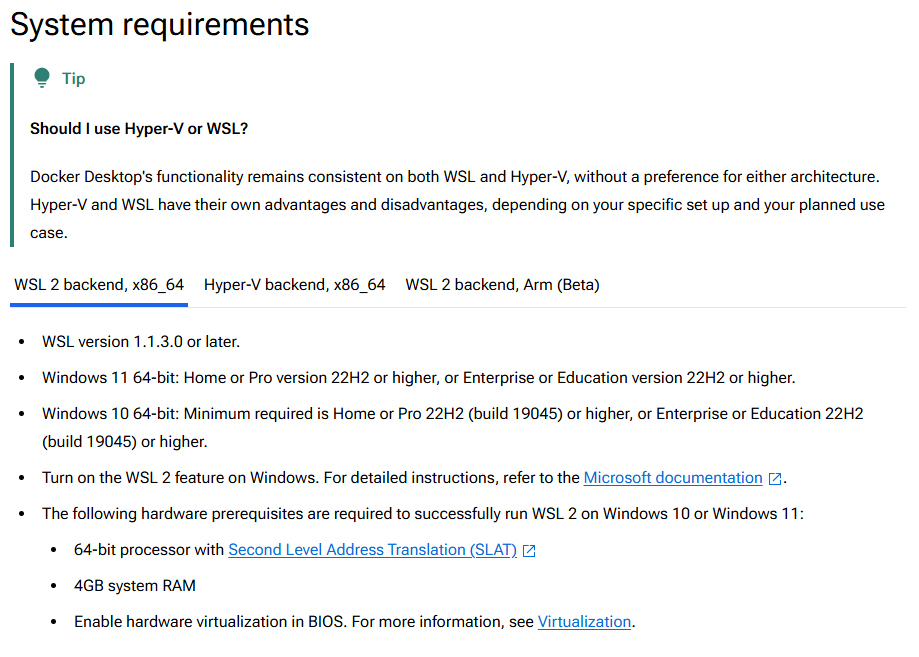

In [26]:
from IPython.display import Image
Image("ETL5.png")

#### Sample.py

In [6]:
#!pip install airflow

In [8]:
"""
Code that goes along with the Airflow located at:
http://airflow.readthedocs.org/en/latest/tutorial.html
"""
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from datetime import datetime, timedelta


default_args = {
    "owner": "airflow",
    "depends_on_past": False,
    "start_date": datetime(2025, 1, 7),
    "email": ["airflow@airflow.com"],
    "email_on_failure": False,
    "email_on_retry": False,
    "retries": 1,
    "retry_delay": timedelta(minutes=5),
    # 'queue': 'bash_queue',
    # 'pool': 'backfill',
    # 'priority_weight': 10,
    # 'end_date': datetime(2016, 1, 1),
}

dag = DAG(dag_id="tutorial", default_args=default_args, schedule_interval='@daily')

# t1, t2 and t3 are examples of tasks created by instantiating operators
t1 = BashOperator(task_id="print_date", bash_command="date", dag=dag)

t2 = BashOperator(task_id="sleep", bash_command="sleep 5", retries=3, dag=dag)

templated_command = """
    {% for i in range(5) %}
        echo "{{ ds }}"
        echo "{{ macros.ds_add(ds, 7)}}"
        echo "{{ params.my_param }}"
    {% endfor %}
"""

t3 = BashOperator(
    task_id="templated",
    bash_command=templated_command,
    params={"my_param": "Parameter I passed in"},
    dag=dag,
)

t2.set_upstream(t1)
t3.set_upstream(t1)

ModuleNotFoundError: No module named 'airflow'

#### docker-airflow/docker-compose-LocalExecutor.yml

In [11]:
version: '3.7'
services:
    postgres:
        image: postgres:9.6
        environment:
            - POSTGRES_USER=airflow
            - POSTGRES_PASSWORD=airflow
            - POSTGRES_DB=airflow
        logging:
            options:
                max-size: 10m
                max-file: "3"

    webserver:
        image: puckel/docker-airflow:1.10.9
        restart: always
        depends_on:
            - postgres
        environment:
            - LOAD_EX=n
            - EXECUTOR=Local
        logging:
            options:
                max-size: 10m
                max-file: "3"
        volumes:
            - ./dags:/usr/local/airflow/dags
            - ./ip_files : usr/local/airflow/ip_files
            - ./op_files : usr/local/airflow/op_files
            # - ./plugins:/usr/local/airflow/plugins
        ports:
            - "8080:8080"
        command: webserver
        healthcheck:
            test: ["CMD-SHELL", "[ -f /usr/local/airflow/airflow-webserver.pid ]"]
            interval: 30s
            timeout: 30s
            retries: 3

SyntaxError: invalid syntax (<ipython-input-11-2014e930cf52>, line 2)

#### Dag1.py

In [21]:
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from airflow.operators.python_operator import PythonOperator
from clean import pre_process

default_args = {
    "owner": "airflow",
    "depends_on_past": False,
    "start_date": datetime(2025, 1, 7),
    "email": ["airflow@airflow.com"],
    "email_on_failure": False,
    "email_on_retry": False,
    "retries": 1,
    "retry_delay": timedelta(minutes=5),
}

# operators linux: bash operator, python: Python Operator, Email : Email Operator 

with DAG(dag_id="test_dag", default_args=default_args, schedule_interval='@daily') as dag:
    
    #task1 : check file
    check_file = BashOperator(
        task_id="check_file", 
        bash_command="~/ip_files/countries.csv", 
        retries = 2,
        retry_delay = timedelta(seconds=15)
    )
    
    #task2 : clean file
    pre_process = PythonOperator(
        task_id = "pre_process",
        python_callable = pre_process 
    )
    
    check_file >> pre_process

ModuleNotFoundError: No module named 'airflow'

Now Restart the cluster 
- docker down: docker-compose –f ./docker-composer-LocalExecutor.yml down

#### clean.py

In [17]:
import pandas as pd
import datetime

def pre_process():
    print("Before adding date column")
    
    df = pd.read_csv("~/ip_files/countries.csv")
    df['CreatedOn'] = datetime.date.today()
    df = df.fillna(0)
    df.to_csv("~/ip_files/countries_cleaned.csv")
    
pre_process()

Before adding date column


FileNotFoundError: [Errno 2] File C:\Users\LENOVO/ip_files/countries.csv does not exist: 'C:\\Users\\LENOVO/ip_files/countries.csv'

#### filter.py

In [ ]:
import pandas as pd

def filter_func():
    print("reading a ccleaened file")
    df = pd.read_csv("~/ip_files/countries_cleaned.csv")
    df[df["country"].startswith('i')]